# Import Libraries

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings(action = "ignore")

# Load Dataset

In [29]:
df = pd.read_csv('Titanic-Dataset.csv')

In [31]:
df[:4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


# Basic Info

In [34]:
print(df.head(2))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   

   Parch     Ticket     Fare Cabin Embarked  
0      0  A/5 21171   7.2500   NaN        S  
1      0   PC 17599  71.2833   C85        C  


In [36]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [38]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [40]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [76]:
(df['Sex'].value_counts())

Sex
male      577
female    314
Name: count, dtype: int64

In [78]:
(df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64

In [82]:
(df['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [86]:
(df['Embarked'].value_counts())

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

# Handle Missing Values

In [43]:
#  Fill missing Age with median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [46]:
print("Mean Age:", df['Age'].mean())
print("Median Fare:", df['Fare'].median())
print("Standard Deviation of Fare:", df['Fare'].std())


Mean Age: 29.36158249158249
Median Fare: 14.4542
Standard Deviation of Fare: 49.693428597180905


# Histograms

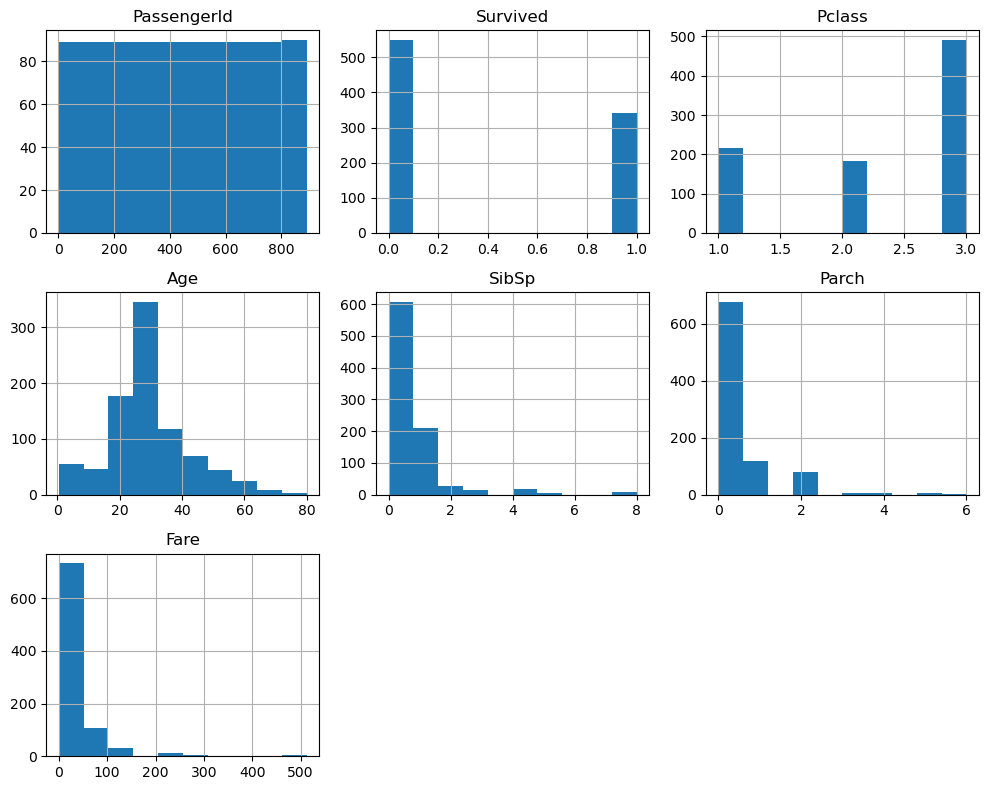

In [51]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Age Distribution')

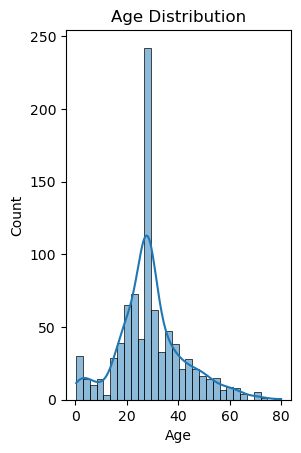

In [88]:
plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")

# BOXPLOTS

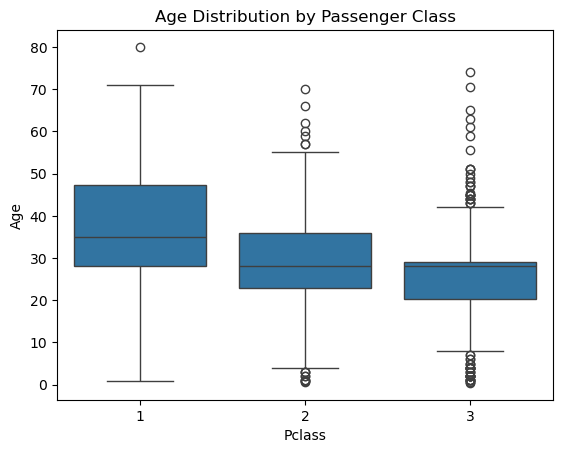

In [54]:
sns.boxplot(x='Pclass', y='Age', data=df)
plt.title('Age Distribution by Passenger Class')
plt.show()

 # Detect Outliers

Text(0.5, 1.0, 'Age Outliers')

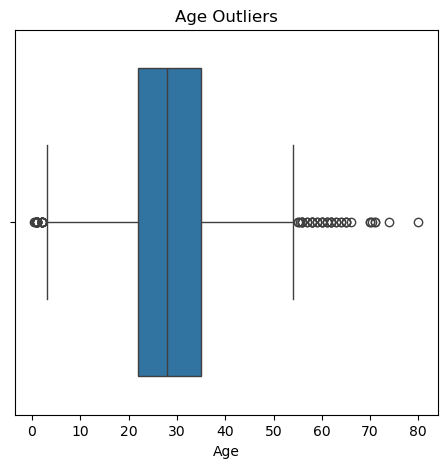

In [90]:
# Boxplot to detect outliers in Age & Fare
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Age'])
plt.title("Age Outliers")

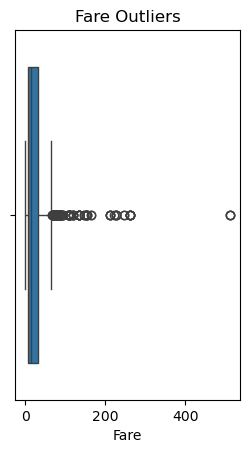

In [92]:
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Fare'])
plt.title("Fare Outliers")
plt.show()

In [95]:
# Find outliers using IQR method
Q1 = df[['Age', 'Fare']].quantile(0.25)
Q3 = df[['Age', 'Fare']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['Age', 'Fare']] < (Q1 - 1.5 * IQR)) | (df[['Age', 'Fare']] > (Q3 + 1.5 * IQR))).sum()
print("Outliers detected: \n", outliers)

Outliers detected: 
 Age      66
Fare    116
dtype: int64


# Check Distributions

In [98]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

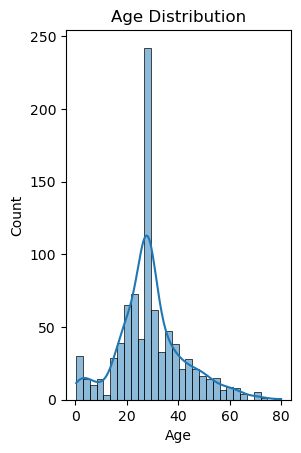

In [100]:
# Histogram for Age
plt.subplot(1, 2, 1)
sns.histplot(df['Age'].dropna(), kde=True, bins=30)
plt.title("Age Distribution")

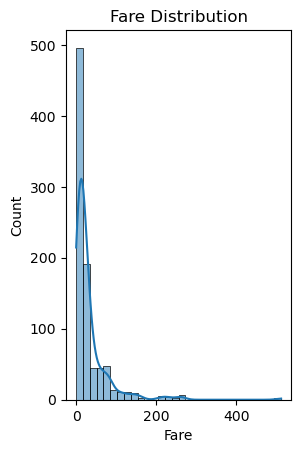

In [102]:
# Histogram for Fare
plt.subplot(1, 2, 2)
sns.histplot(df['Fare'].dropna(), kde=True, bins=30)
plt.title("Fare Distribution")
plt.show()

In [104]:
# Skewness check
print("Skewness of Age:", df['Age'].skew())
print("Skewness of Fare:", df['Fare'].skew())

Skewness of Age: 0.5102446555756495
Skewness of Fare: 4.787316519674893


# Detect Patterns

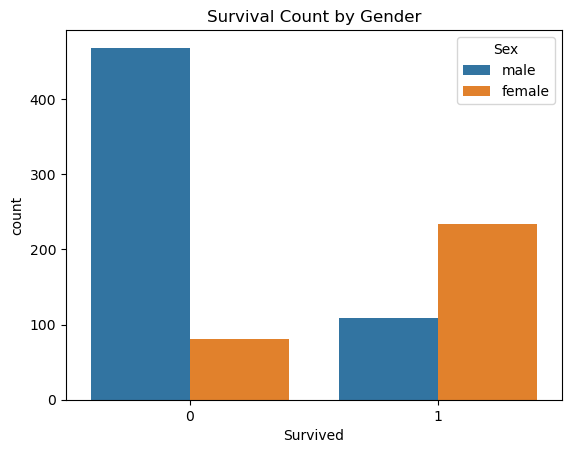

In [107]:
# Survival Rate by Gender
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival Count by Gender")
plt.show()

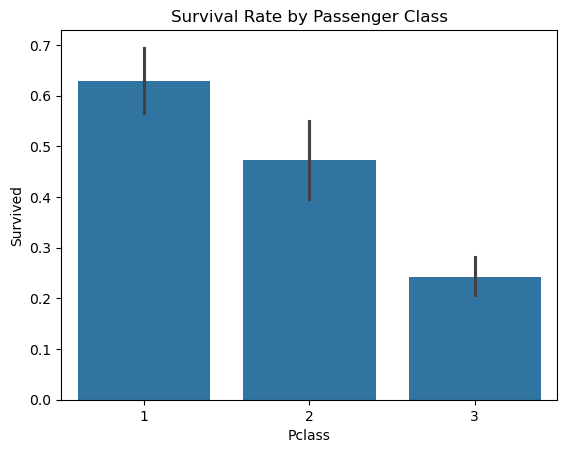

In [109]:
# Survival Rate by Passenger Class
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

In [111]:
# Grouping Data to Find Patterns
print(df.groupby(['Sex', 'Pclass'])['Survived'].mean())


Sex     Pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: Survived, dtype: float64


# Feature Relationships

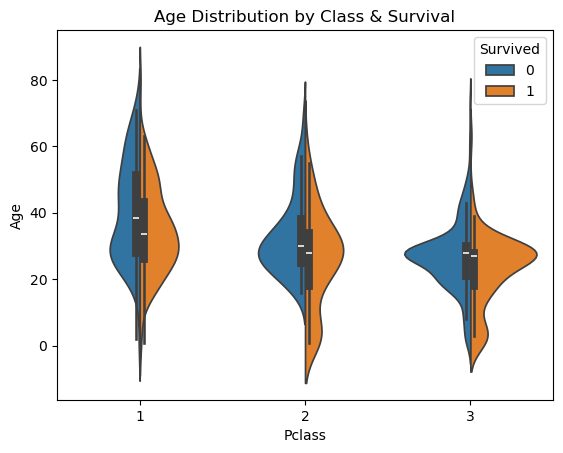

In [116]:
# Violin plot to show survival by age & class
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)
plt.title("Age Distribution by Class & Survival")
plt.show()

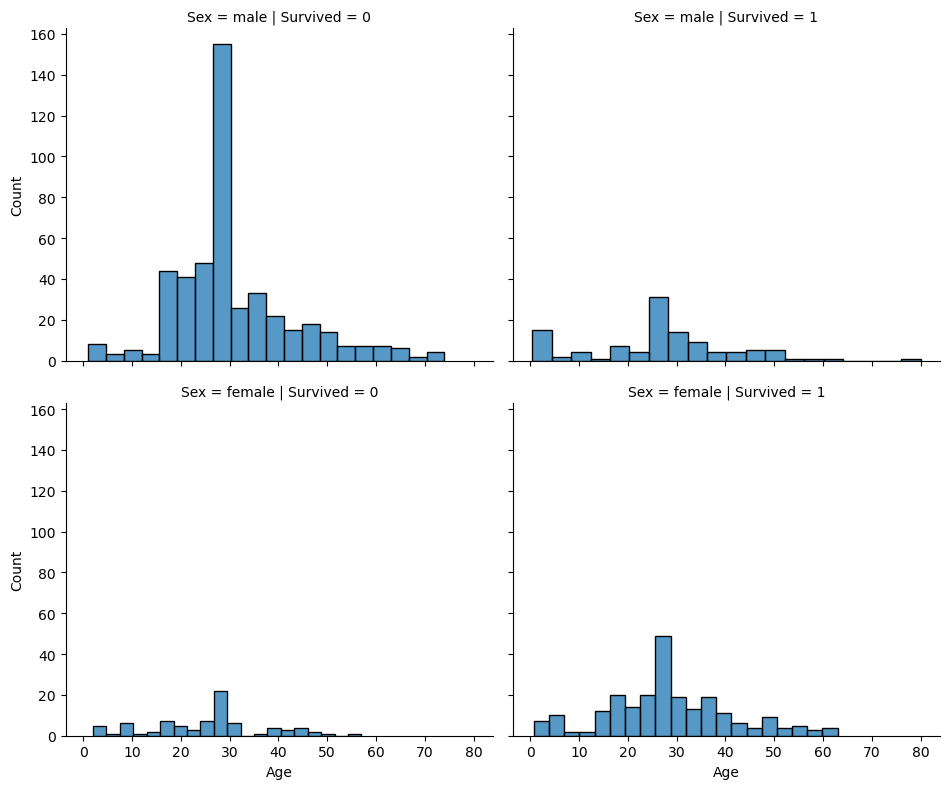

In [119]:
# FacetGrid to compare survival by Age & Sex
g = sns.FacetGrid(df, col="Survived", row="Sex", height=4, aspect=1.2)
g.map(sns.histplot, "Age", bins=20)
plt.show()

# CORRELATION MATRIX

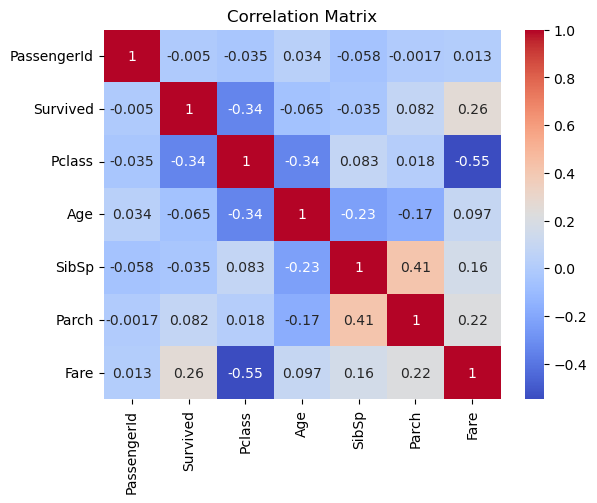

In [57]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Pairplot (for small number of features)

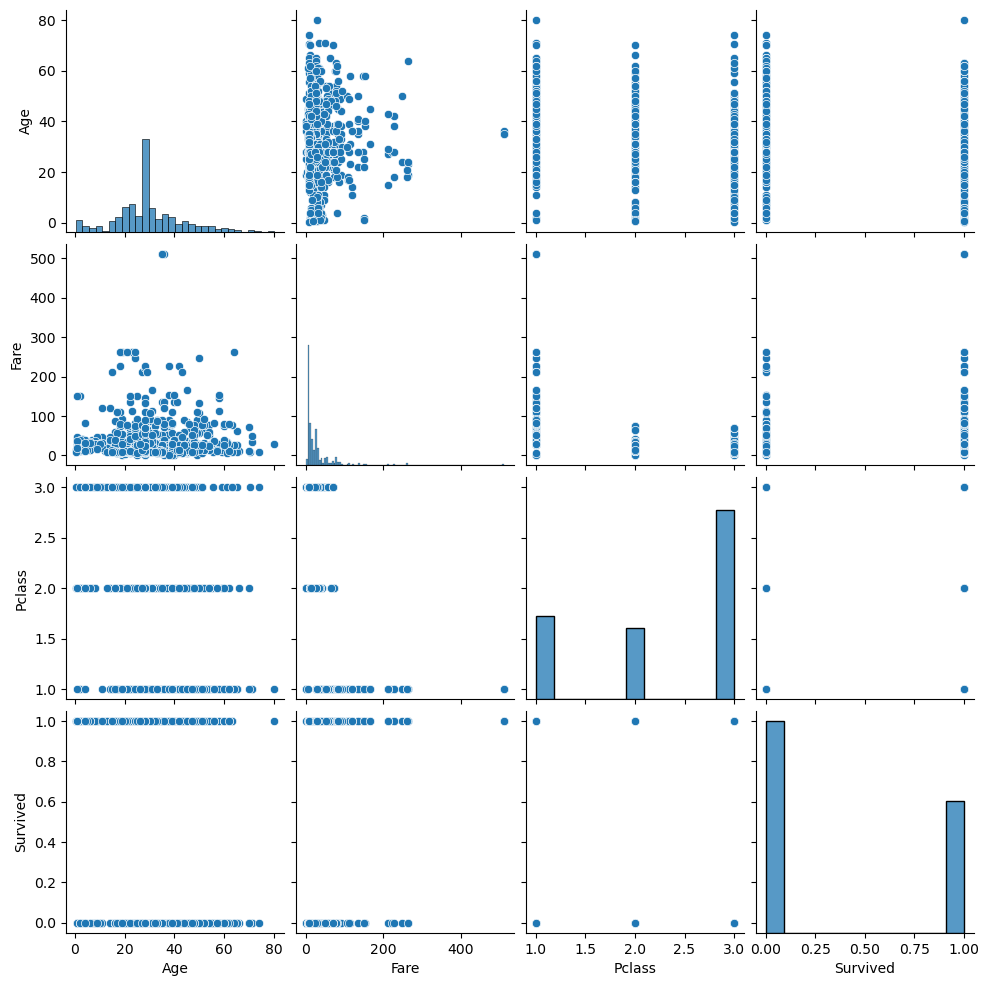

In [60]:
sns.pairplot(df[['Age', 'Fare', 'Pclass', 'Survived']].dropna())
plt.show()

# Skewness Check

In [63]:
print(df.skew(numeric_only=True))

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.510245
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


# Categorical Plot Example

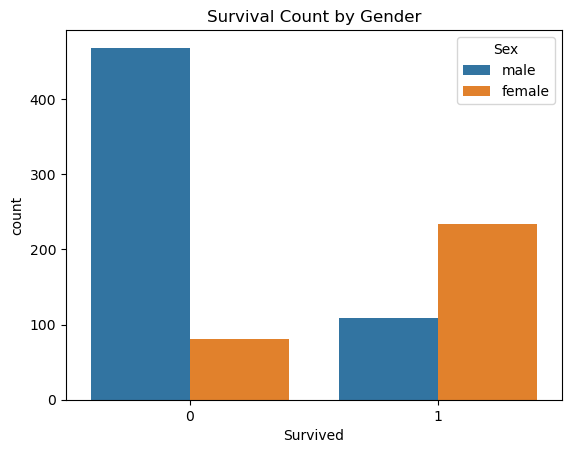

In [68]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title("Survival Count by Gender")
plt.show()

# Interactive Plot

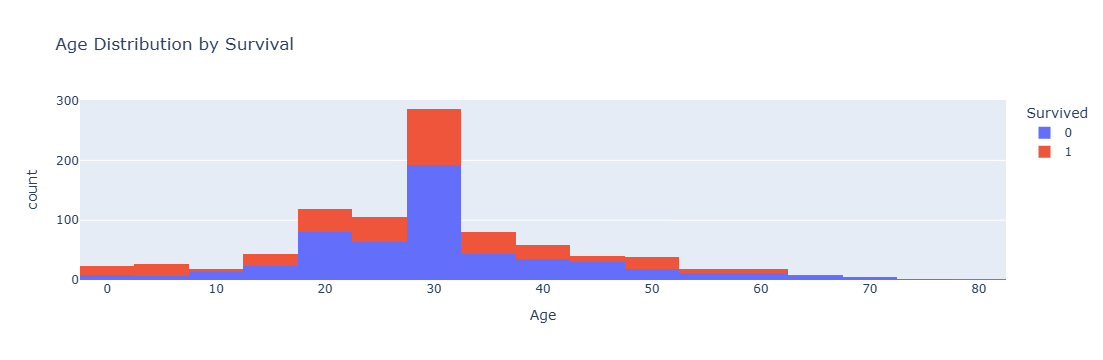

In [74]:
fig = px.histogram(df, x='Age', color='Survived', nbins=30, title="Age Distribution by Survival")
fig.show()
